In [1]:
import os
current_path = os.getcwd()
print(current_path)

c:\Users\gugum\code\curioS\use_cases\Flooding_chicago


(<Figure size 640x480 with 2 Axes>, <Axes: >)

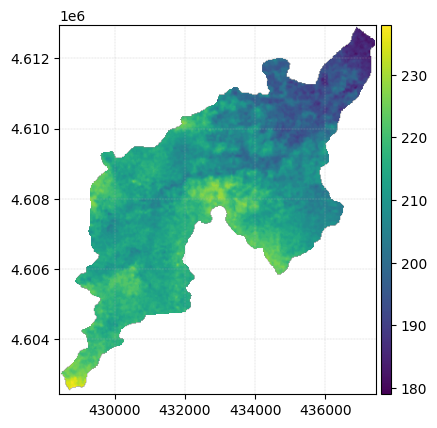

In [ ]:
from synxflow import IO
import numpy as np

DEM = IO.Raster('./flooding_data/output.tif')

# header = DEM.header.copy()  # Critical: copy the header

# # 2. Create new array with proper slope
# x = np.linspace(0, header['ncols']-1, header['ncols'])
# y = np.linspace(0, header['nrows']-1, header['nrows'])
# xx, yy = np.meshgrid(x, y)
# slope = xx * 0.01 * header['cellsize']  # 0.1% eastward slope

# # 3. Create new DEM from scratch
# new_array = DEM.array + slope
# modified_DEM = IO.Raster(array=new_array, header=header)

# # 4. Force-write and reload to verify
# temp_file = "modified_dem.tif"
# modified_DEM.write(temp_file)
# verified_DEM = IO.Raster(temp_file)

# # 5. Visual comparison
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12,5))
# plt.subplot(121)
# DEM.mapshow(title="Original DEM")
# plt.subplot(122)
# verified_DEM.mapshow(title="Modified DEM")
# plt.show()

# # Cleanup
# import os
# os.remove(temp_file)

# DEM = verified_DEM

DEM.mapshow()

In [3]:
# import pandas as pd

# # 1. Read and prepare the data
# df = pd.read_csv("./chicago-data/OHareStationOriginal.csv", 
#                  parse_dates=["DATE"], 
#                  usecols=["DATE", "HourlyPrecipitation"])
# df.columns = ["Date", "PRCP (in)"]
# print(df)

# # 2. Compute a "Seconds" column: how many seconds since earliest Date
# df["Seconds"] = (df["Date"] - df["Date"].min()).dt.total_seconds().astype(int)
# # 3. Convert precipitation to numeric and drop NaNs
# df["PRCP (in)"] = pd.to_numeric(df["PRCP (in)"], errors="coerce")
# df = df.dropna(subset=["PRCP (in)"])

# # 4. Convert inches to meters
# df["PRCP (m)"] = df["PRCP (in)"] * 0.0254

# # 5. Define the interval size (in seconds); let's say 360s = 6 minutes
# interval_size = 360

# # 6. "Snap" each row's Seconds to the *start* of its interval (0, 360, 720, etc.)
# df["IntervalStart"] = (df["Seconds"] // interval_size) * interval_size

# # 7. Group by IntervalStart and sum precipitation
# grouped = (
#     df.groupby("IntervalStart", as_index=False)["PRCP (m)"]
#     .sum()
#     .rename(columns={"PRCP (m)": "TotalPRCP (m)"})
# )

# # 8. Calculate intensity (if desired) as total precip / interval duration
# grouped["Intensity (m/s)"] = grouped["TotalPRCP (m)"] / interval_size

# # 9. Sort by IntervalStart (smallest to largest) and inspect
# grouped.sort_values("IntervalStart", inplace=True)
# print(grouped.head(20))



[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.

(<Figure size 640x480 with 2 Axes>, <Axes: >)

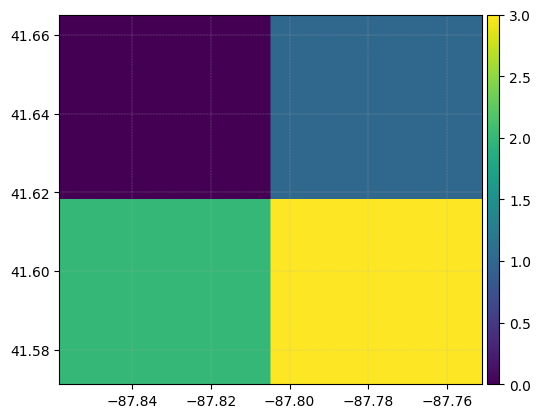

In [ ]:
from synxflow import IO
rain_mask = IO.Raster("./flooding_data/rain_mask.tif")

rain_mask.mapshow()

In [ ]:
import pandas as pd
# rain_source = pd.read_csv("./rain_source.csv", header=None)
rain_source = pd.read_csv("./flooding_data/alternate_rain_source.csv", header=None)
rain_source_np = rain_source.to_numpy()
rain_source.head()

,0,1,2,3,4
0,0,0,0.000539,0,0.000005
1,360,0,0.000539,0,0.000005
2,720,0,0.000539,0,0.000005
3,1080,0,0.000539,0,0.000005
4,1440,0,0.000539,0,0.000005


In [ ]:
import os
ngpus = 1
case_folder = os.path.join('./', 'flooding_data') # define a case folder in the current directory
# case_folder = './'
case_input = IO.InputModel(DEM, num_of_sections=ngpus, case_folder=case_folder)

c:\Users\gugum\miniforge3\envs\synxflow-env\lib\site-packages\synxflow\IO\Boundary.py:272: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_table.name[0] = 'Outline boundary'
c:\Users\gugum\miniforge3\envs\synxflow-env\lib\site-packages\sy

In [7]:
case_input.set_initial_condition('h0', 0.0)

In [8]:


# import numpy as np
# box_upstream = np.array([[87.704519, 41.972513],  # bottom left 87.7045198°W 41.9725131°N 
#                          [87.703592, 41.974208]]) # upper right 87.7035924°W 41.9742085°N 

# box_downstream = np.array([[87.616182, 41.888654], # upper left 87.6161820°W 41.8886546°N 
#                            [87.614439, 41.8878433]]) # bottom right 87.6144392°W 41.8878433°N 

# discharge_values = np.array([[0, 100], # first column: time - s; second colum: discharge - m3/s
#                             [3600,100]])

In [9]:
# bound_list = [
#             {'polyPoints': box_upstream,
#              'type': 'open',
#              'hU': discharge_values},
#             {'polyPoints': box_downstream,
#              'type': 'open',
#              'h': np.array([[0, 5],
#                             [3600,5]])}] # we fix the downstream depth as 12.5 m

(<Figure size 640x480 with 2 Axes>, <Axes: title={'center': 'Domain Map'}>)

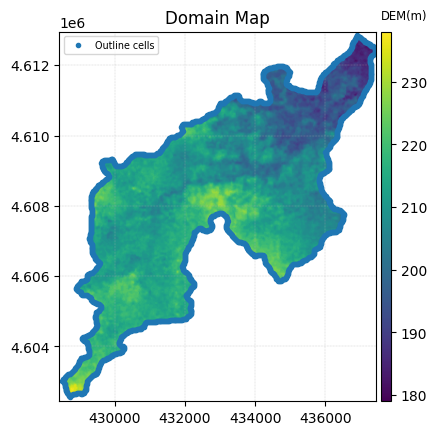

In [10]:
# case_input.set_boundary_condition(boundary_list=bound_list)
case_input.domain_show()


In [11]:
case_input.set_rainfall(rain_mask=rain_mask, rain_source=rain_source_np)
# case_input.set_rainfall(rain_source=rain_source_np)


In [12]:
case_input.set_grid_parameter(manning=0.035)

In [13]:
# The final thing we want to set up is the runtime. 
# We want to run the simulation for 2 hours, get the raster outpurs for every 15 minutes 
# and backup the simulation for every half an hour.

# case_input.set_runtime([0, 3600*96, 3600, 3600*96])
# case_input.set_runtime([0, 7200, 900, 1800])
# case_input.set_runtime([0, 7200, 300, 300])
case_input.set_runtime([0, 3600, 60, 60])
print(case_input)
case_input.write_input_files()

---------------------- Model information ---------------------
case_folder : ./data
birthday : 2025-03-30 18:40
num_GPU : 1
run_time : [0, 3600, 60, 60]
num_gauges : 2
---------------------- Grid information ----------------------
area : [np.float64(34.819825604718595), 'km^2']
shape : (393, 337)
cellsize : [26.757362390421342, 'm']
num_cells : 48634
extent : {'left': 428427.7933215814, 'right': 437445.0244471534, 'bottom': 4602438.36674475, 'top': 4612954.010164185}
---------------------- Initial condition ---------------------
h0 : 0.0
hU0x : 0
hU0y : 0
---------------------- Boundary condition --------------------
num_boundary : 1
boundary_details : ['0. (outline) fall, h and hU fixed as zero, number of cells: 1378']
---------------------- Rainfall ------------------------------
num_source : 1
max : [np.float64(1940.0), 'mm/h']
sum : [np.float64(1746.0), 'mm']
average : [np.float64(1940.0), 'mm/h']
spatial_res : [np.float64(5901.0), 'm']
temporal_res : [np.float64(360.0), 's']
-----

c:\Users\gugum\miniforge3\envs\synxflow-env\lib\site-packages\synxflow\IO\rainfall_processing.py:261: UserWarning: Very large rainfall rates, better check your data!
  warnings.warn('Very large rainfall rates, better check your data!')


In [14]:
from synxflow import flood
if case_input.num_of_sections > 1:
    flood.run_mgpus(case_input.get_case_folder())
else:
    flood.run(case_input.get_case_folder())

0.004999999888241291
60.0
60.0
83.75494384765625
90.46145629882812
97.13616943359375
103.41929626464844
109.1087875366211
114.06658935546875
118.41696166992188
120.0
120.0
123.7253189086914
127.1759262084961
130.42002868652344
133.5081024169922
136.4755096435547
139.34642028808594
142.1385498046875
144.8658905029297
147.54025268554688
150.17245483398438
152.7736053466797
155.35377502441406
157.92593383789062
160.5022735595703
163.09596252441406
165.71507263183594
168.36268615722656
171.0053253173828
173.6114959716797
176.1583251953125
178.65203857421875
180.0
180.0
182.41883850097656
184.79742431640625
187.13912963867188
189.4468231201172
191.7229766845703
193.9696807861328
196.188720703125
198.381591796875
200.54959106445312
202.69381713867188
204.81521606445312
206.9145965576172
208.99269104003906
211.05067443847656
213.09457397460938
215.12942504882812
217.15963745117188
219.18917846679688
221.22166442871094
223.2604522705078
225.3086700439453
227.36915588378906
229.4444580078125
23

In [15]:
import os
current_path = os.getcwd()
print(current_path)

case_input_copy = case_input
print(case_input_copy.get_case_folder())
case_input_copy.set_case_folder(current_path)

case_output = IO.OutputModel(input_obj = case_input_copy)

c:\Users\gugum\code\curioS\use_cases\Flooding_chicago\data
./data


In [16]:
gauges_pos, times, values = case_output.read_gauges_file(file_tag = 'h')

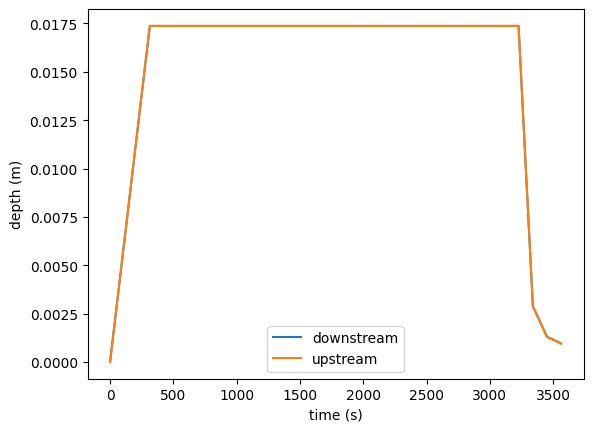

In [17]:
import matplotlib.pyplot as plt
lines = plt.plot(times, values)
plt.xlabel('time (s)')
plt.ylabel('depth (m)')
plt.legend(lines[:2],['downstream','upstream'])
plt.show()

(<Figure size 640x480 with 2 Axes>, <Axes: >)

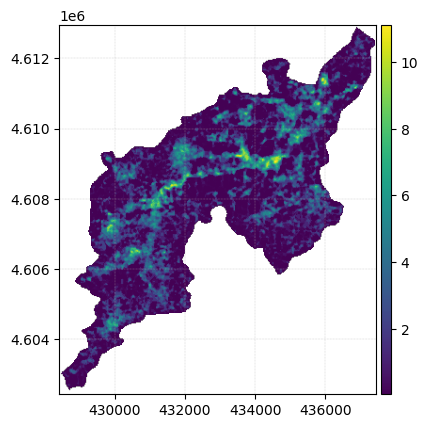

In [18]:
# max_depth = case_output.read_grid_file(file_tag='h_max_345600')
max_depth = case_output.read_grid_file(file_tag='h_max_3600')
max_depth.mapshow()

In [19]:
# import numpy as np

# # asc_file = './chicago-case/output/h_max_345600.asc'
# asc_file = './output/h_max_7200.asc'

# header_info = {}
# with open(asc_file, 'r') as f:
#     # The first 6 lines define the header
#     for _ in range(6):
#         line = f.readline().strip()
#         key, value = line.split()
#         header_info[key.lower()] = float(value)
        
#     # Read the rest of the file as a 2D NumPy array
#     data = np.loadtxt(f)

# print("Header info:", header_info)
# print("Data shape:", data.shape)


In [20]:
# import numpy as np

# # asc_file = './chicago-case/output/h_max_345600.asc'
# asc_file = './output/h_max_7200.asc'
# header_info = {}
# with open(asc_file, 'r') as f:
#     for _ in range(6):  # read header lines
#         line = f.readline().strip()
#         key, value = line.split()
#         header_info[key.lower()] = float(value)
    
#     data = np.loadtxt(f)  # read the numeric raster data

# # Identify NoData value from the header (usually under "nodata_value")
# nodata_value = header_info.get('nodata_value', -9999)  # default to -9999 if not found

# # Create a Boolean mask where valid_data is True if data != nodata_value
# valid_mask = (data != nodata_value)

# min_val = data[valid_mask].min()
# max_val = data[valid_mask].max()

# print("Minimum (ignoring NoData):", min_val)
# print("Maximum (ignoring NoData):", max_val)


In [21]:
# import numpy as np
# import matplotlib.pyplot as plt

# asc_file = './output/h_max_7200.asc'
# header_info = {}

# with open(asc_file, 'r') as f:
#     # Read the header lines
#     for _ in range(6):
#         line = f.readline().strip()
#         key, value = line.split()
#         # Convert value to float (or int if you prefer)
#         header_info[key.lower()] = float(value)
    
#     # Read the raster values
#     data = np.loadtxt(f)

# # Extract no-data value
# nodata_value = header_info.get('nodata_value', -9999)

# # Convert NoData cells to np.nan (or use a masked array)
# data = np.where(data == nodata_value, np.nan, data)

# # Optional: build an 'extent' so the image axes match the real spatial coordinates
# ncols = int(header_info['ncols'])
# nrows = int(header_info['nrows'])
# xllcorner = header_info['xllcorner']
# yllcorner = header_info['yllcorner']
# cellsize  = header_info['cellsize']

# # The extent format is [x_min, x_max, y_min, y_max]
# extent = [
#     xllcorner, 
#     xllcorner + ncols * cellsize,
#     yllcorner,
#     yllcorner + nrows * cellsize
# ]

# # Plot
# plt.imshow(data, 
#            origin='upper',  # ASCII grid often starts from top-left, but adjust if needed
#            extent=extent,   
#            cmap='viridis')  # or any other colormap
# plt.colorbar(label='Raster Values')
# plt.title('Raster Plot')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.show()
